# Introduction

## Table of contents

### Converting between IJ and numpy
#### Excercise: Process numpy arrays in IJ
#### Excercise: Send an IJ image into numpy
#### Excercise: Load and display an RGB image from ImageJ
### Runing macros, scripts, and plugins from python
#### Exercise: Fill in a macro
#### Example: Run a plugin

## Starting ImageJ

In [1]:
import imagej

Replace the path below with the path to your fiji installation

In [2]:
ij = imagej.init(r'C:\users\michael\fiji.app')

Added 373 JARs to the Java classpath.


WARNING 2018-12-02 15:23:09,261: JVM is already running, will not add endpoints to classpath -- required classes might not be on classpath..


## Utility functions in ij.py
pyImageJ comes with a series of helper functions that help convert between Java and Python, make scripting and plugins easy to run, and a quick 2D plotting function.

In [3]:
help(ij.py)

Help on ImageJPython in module imagej.imagej object:

class ImageJPython(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, ij)
 |  
 |  dims(self, image)
 |      Return the dimensions of the equivalent numpy array for the image.  Reverse dimension order from Java.
 |  
 |  from_java(self, data)
 |      Converts the data into a python equivalent
 |  
 |  new_numpy_image(self, image)
 |      Creates a numpy image (NOT a Java image)
 |      dimensioned the same as the given image.
 |  
 |  rai_to_numpy(self, rai)
 |      Convert a RandomAccessibleInterval into a numpy array
 |  
 |  run_macro(self, macro, args=None)
 |      Run an ImageJ1 style macro script
 |      :param macro: The macro code
 |      :param args: Arguments for the script as a dictionary of key/value pairs
 |      :return:
 |  
 |  run_plugin(self, plugin, args=None, ij1_style=True)
 |      Run an ImageJ plugin
 |      :param plugin: The string name for the plugin command
 |      :param args: A dict of ma

The functions `to_java` and `to_python` are capable of handling common data types.  Their is one important nuance; converting a numpy array to java creates a java object that points to the numpy array.  This means that changing the java object also changes the numpy array.

In [4]:
# Lists convert and handle simply
ex_list = [1, 2, 3, 4]
print(type(ex_list))
java_list = ij.py.to_java(ex_list)
print(type(java_list))

<class 'list'>
<class 'jnius.reflect.java.util.ArrayList'>


A java list can be accessed the same as a python list. Changing values in the python list does not change values in the java_list

In [5]:
ex_list[0] = 4
java_list[0]

1

By contrast, ops can operate on numpy arrays and change them, though you need to wrap the arrays in `to_java` first.

In [6]:
import numpy as np
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])
arr_output = ij.py.new_numpy_image(arr1)

ij.op().run('multiply', ij.py.to_java(arr_output), ij.py.to_java(arr1), ij.py.to_java(arr2))
arr_output

array([[ 5., 12.],
       [21., 32.]])

#### Technical note for using ops on numpy arrays
Numpy arrays become RandomAccessibleIntervals and can substitute for IterableIntervals. 

In [7]:
print(type(ij.py.to_java(arr1)))

<class 'jnius.reflect.net/imglib2/python/ReferenceGuardingRandomAccessibleInterval'>


If you need to trouble shoot op workings, look for implementations that use only IterableIntervals or RandomAccessibleIntervals.  To find the implementations use the `print(ij.op().help())` function.

For the multiply function the implementation we used is second to last (`net.imagej.ops.math.IIToRAIOutputII$Multiply`)

In [8]:
# Print is required to render newlines
print(ij.op().help('multiply'))

Available operations:
	(ArrayImg arg) =
	net.imagej.ops.math.ConstantToArrayImageP$MultiplyByte(
		ArrayImg arg,
		byte value)
	(ArrayImg arg) =
	net.imagej.ops.math.ConstantToArrayImageP$MultiplyDouble(
		ArrayImg arg,
		double value)
	(ArrayImg arg) =
	net.imagej.ops.math.ConstantToArrayImageP$MultiplyFloat(
		ArrayImg arg,
		float value)
	(ArrayImg arg) =
	net.imagej.ops.math.ConstantToArrayImageP$MultiplyInt(
		ArrayImg arg,
		int value)
	(ArrayImg arg) =
	net.imagej.ops.math.ConstantToArrayImageP$MultiplyLong(
		ArrayImg arg,
		long value)
	(ArrayImg arg) =
	net.imagej.ops.math.ConstantToArrayImageP$MultiplyShort(
		ArrayImg arg,
		short value)
	(ArrayImg arg) =
	net.imagej.ops.math.ConstantToArrayImageP$MultiplyUnsignedByte(
		ArrayImg arg,
		byte value)
	(ArrayImg arg) =
	net.imagej.ops.math.ConstantToArrayImageP$MultiplyUnsignedInt(
		ArrayImg arg,
		int value)
	(ArrayImg arg) =
	net.imagej.ops.math.ConstantToArrayImageP$MultiplyUnsignedLong(
		ArrayImg arg,
		long value)
	(Arr

## Excercise: Process numpy arrays in IJ

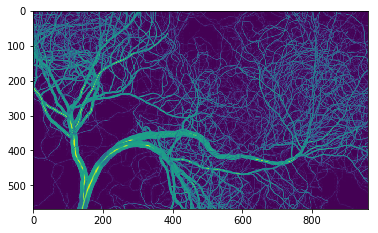

In [9]:
# Import an image with scikit-image.
# NB: Blood vessel image from: https://www.fi.edu/heart/blood-vessels
from skimage import io
url = 'https://www.fi.edu/sites/fi.live.franklinds.webair.com/files/styles/featured_large/public/General_EduRes_Heart_BloodVessels_0.jpg'
img = io.imread(url)
img = np.mean(img, axis=2)
ij.py.show(img)

Ops can take converted numpy arrays as inputs and modify them.  Fill the following cell to call the IJ Frangi vesselness op and display the resulting image.

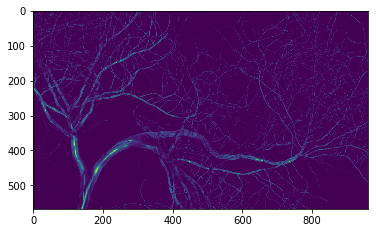

In [10]:
# Create a blank numpy image of the same size as the input
vessels = ij.py.new_numpy_image(img)

# Call the IJ frangiVesselness op with these inputs: ({Output image} , {Input image}, [1, 1], 20)
ij.op().filter().frangiVesselness(ij.py.to_java(vessels), ij.py.to_java(img), [1, 1], 20)

# Display the image
ij.py.show(vessels)

## Excercise: Send an ImageJ image into Numpy

Open an image from the url using the IJ scripting interface and then send it to a numpy array.

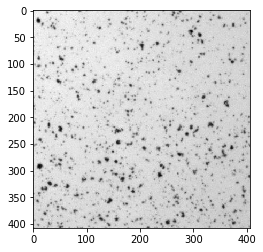

In [11]:
url_colony = 'http://wsr.imagej.net/images/Cell_Colony.jpg'

# Load the image
cell_colony = ij.io().open(url_colony)

# Send it to numpy
numpy_colony = ij.py.from_java(cell_colony)

# Display the image
ij.py.show(numpy_colony, cmap='gray')

### Warning: RGB and other axis conventions must be handled manually

Numpy is reverse indexed from ImageJ, e.g. axis order in numpy is ZYX and in ImageJ is (by default) XYZ.  In addition, numpy and matplotlib have alimited understanding of axis conventions and only natively handle 3-channel RGB images as YXC.  However, conversion between numpy and ImageJ is currently handled by simply reversing the axis order, so taking an ImageJ RGB -> numpy needs an additional step to plot correctly.

A future update will add ways of handling this using pyimagej, but this is currently in the hands of the user.

## Excercise: Load and display an RGB image from ImageJ

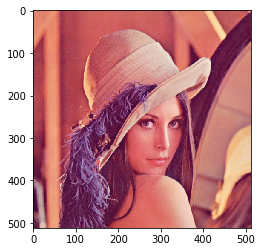

In [12]:
# Show the final image by loading and plotting it from the Scikit-image library
rgb_url = 'http://wsr.imagej.net/images/lena.jpg'
img_from_skimage = io.imread(rgb_url)
ij.py.show(img_from_skimage)

### Fix these cells so that it loads the image using ImageJ and plots it correctly

In [13]:
# load the image into IJ
ij_img = ij.io().open(rgb_url)

# Convert the image to a numpy array
img_from_ij = ij.py.from_java(ij_img)

np.shape(img_from_ij)

(3, 512, 512)

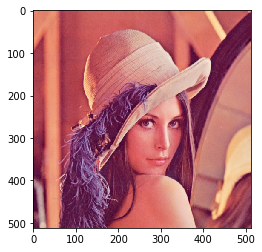

In [14]:
# Hint: There are two barriers to plotting the image: the axis order, and that matplotlib only plot 8-bit RGB images
# Convert to 8-bit
img_as_8bit = img_from_ij.astype(int)

# Fix the axis order
img_as_rgb = np.moveaxis(img_as_8bit, 0, -1)

# Plot the image
ij.py.show(img_as_rgb)

## Running macros, scripts, and plugins from python

### Excercise: Fill in a macro
Running an IJ1 style macro is as simple as providing the macro code in a string, and the arguments in a dictionary to `run_macro`. Modify the following cell to print your name, age, and city.

In [15]:
macro = """
#@ String name
#@ int age
#@ String city
#@output Object greeting
greeting = "Hello " + name + ". You are " + age + " years old, and live in " + city + "."
"""
args = {
    'name': 'Chuckles',
    'age': 13,
    'city': 'Nowhere'
}
result = ij.py.run_macro(macro, args)
print(result.getOutput('greeting'))

Hello Chuckles. You are 13 years old, and live in Nowhere.


Running scripts in other languages is similar, but you also have to specify the file extension for the scripting language it is written in.

In [16]:
language_extension = 'ijm'
result_script = ij.py.run_script(language_extension, macro, args)
print(result_script.getOutput('greeting'))

Hello Chuckles. You are 13 years old, and live in Nowhere.


### Example: Run a plugin
Finally, running plugins works in the same manner as macros.  You simply enter the plugin name as a string and the arguments in a dict.  For the few plugins that use IJ2 style macros (i.e., explicit booleans in the recorder), set the optional variable `ij1_style=False`

This example works with IJ1 windows, opening images entirely within IJ and then getting the results.  Working with IJ1 windows requires importing another class, which is done using the jnius framework.  The jnius.autoclass function can import other java classes for similar purposes.

In [86]:
from jnius import autoclass
WindowManager = autoclass('ij.WindowManager')
ij.py.run_macro("""run("Blobs (25K)");""")
blobs = WindowManager.getCurrentImage()
print(blobs)

<ij.ImagePlus at 0x1720c6cdeb8 jclass=ij/ImagePlus jself=<LocalRef obj=0x7fdb6fd0 at 0x1720c75c570>>


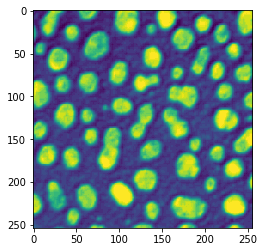

In [87]:
ij.py.show(blobs)

We can now run plugins that require open IJ1 windows on blobs

In [88]:
plugin = 'Mean'
args = {
    'block_radius_x': 10,
    'block_radius_y': 10
}

ij.py.run_plugin(plugin, args)

<org.scijava.script.ScriptModule at 0x1720e9dadb0 jclass=org/scijava/script/ScriptModule jself=<LocalRef obj=0x7fdaa988 at 0x1720bcaabb0>>

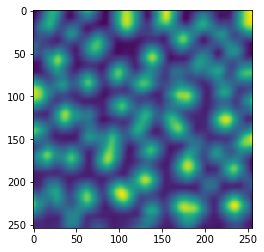

In [89]:
result = WindowManager.getCurrentImage()
result = ij.py.show(result)

You can list any active IJ1 windows with the following command.

In [90]:
print(ij.py.from_java(ij.window().getOpenWindows()))

['blobs.gif']


You can close any IJ1 windows through the following command.

In [91]:
ij.window().clear()
print(ij.py.from_java(ij.window().getOpenWindows()))

[]
